## 1. OUTLIERS
* Catching Outliers : boxplot, outlier_thresholds, check_outlier, grab_outliers
* Solving Outlier Problem : drop , re-assignment with thresholds, local outlier factor

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 170)

In [53]:
def load_titanic():
    data = pd.read_csv("titanic.csv")
    return data

df = load_titanic()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


### Catching Outliers

#### 1 . Box Plot

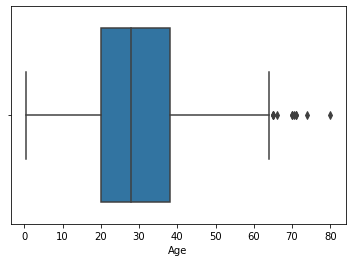

count   714.000
mean     29.699
std      14.526
min       0.420
25%      20.125
50%      28.000
75%      38.000
max      80.000
Name: Age, dtype: float64

In [54]:
sns.boxplot(x=df["Age"])
plt.show()

df["Age"].describe().T

#### 2 . Outlier Thresholds

In [55]:
def outlier_thresholds(dataframe, col_name):
    quartile1 = dataframe[col_name].quantile(0.25)
    quartile3 = dataframe[col_name].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

outlier_thresholds(df, "Fare")

low, up = outlier_thresholds(df, "Age")
print("low : " ,low)
print("up : " ,up)

low :  -6.6875
up :  64.8125


#### 3 . Check Outlier

In [56]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    date_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "datetime64[ns]"]

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O" and dataframe[col].dtypes != "datetime64[ns]"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O" and
                dataframe[col].dtypes != "datetime64[ns]"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'date_cols: {len(date_cols)}')
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    # date_cols + cat_cols + num_cols + cat_but_car = number of variables
    # num_but_cat can be using only reporting

    return date_cols, cat_cols, cat_but_car, num_cols, num_but_cat

In [57]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

check_outlier(df, "Age")

date_cols, cat_cols, cat_but_car, num_cols, num_but_cat = grab_col_names(df)

for col in num_cols:
    print(col, check_outlier(df, col))

Observations: 891
Variables: 12
date_cols: 0
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4
PassengerId False
Age True
Fare True


#### 4 . Grab Outliers

In [58]:
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)
    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

grab_outliers(df, "Age")
grab_outliers(df, "Age", True)

     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q
     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 2457

Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

In [59]:
# RECAP - 1

outlier_thresholds(df, "Age")

(-6.6875, 64.8125)

In [60]:
# RECAP - 2

check_outlier(df, "Age")

True

In [61]:
# RECAP - 3

grab_outliers(df, "Age", True)

     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q


Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

### Solving Outlier Problem

#### 1 . Drop Outliers

In [62]:
def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

for col in ["Age", "Fare"]:
    new_df = remove_outlier(df, col)

df.shape[0] - new_df.shape[0]

116

#### 2 . Re-assignment with thresholds

In [63]:
def replace_with_thresholds(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if low_limit > 0:
        dataframe.loc[(dataframe[col_name] < low_limit), col_name] = low_limit
        dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit
    else:
        dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit


df = load_titanic()

print("Before re-assignment\n")
for col in ["Age", "Fare"]:
    print(col, check_outlier(df, col))

for col in ["Age", "Fare"]:
    replace_with_thresholds(df, col)

print("\n")

print("After re-assignment\n")
for col in ["Age", "Fare"]:
    print(col, check_outlier(df, col))

Before re-assignment

Age True
Fare True


After re-assignment

Age False
Fare False


In [64]:
# RECAP - 1

df = load_titanic()
df.shape

(891, 12)

In [65]:
# DETERMINING OUTLIERS - 1 
outlier_thresholds(df, "Age")

(-6.6875, 64.8125)

In [66]:
# DETERMINING OUTLIERS - 2
check_outlier(df, "Age")

True

In [67]:
# DETERMINING OUTLIERS - 3
grab_outliers(df, "Age", index=True)

     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q


Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

In [68]:
# RECAP - 2

df = load_titanic()
df.shape

(891, 12)

In [69]:
# HANDLING OUTLIERS -1
remove_outlier(df, "Age").shape

(880, 12)

In [70]:
# HANDLING OUTLIERS -2
replace_with_thresholds(df, "Age")
check_outlier(df, "Age")

False

### Multivariate Outlier Detection: Local Outlier Factor

In [71]:
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include=['float64', 'int64'])
df = df.dropna()
df.head()

for col in df.columns:
    print(col, check_outlier(df, col))

carat True
depth True
table True
price True
x True
y True
z True


In [72]:
clf = LocalOutlierFactor(n_neighbors=20)
clf.fit_predict(df)
df_scores = clf.negative_outlier_factor_
df_scores

array([-1.58352526, -1.59732899, -1.62278873, ..., -1.06721815,
       -1.00809552, -1.00849038])

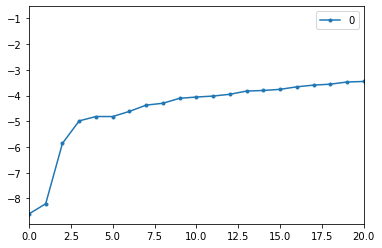

In [73]:
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 20], style='.-')
plt.show()

In [74]:
df.shape

(53940, 7)

In [75]:
df[df_scores < threshold_value].index

Int64Index([41918, 48410, 49189], dtype='int64')

In [76]:
threshold_value = np.sort(df_scores)[3]
df = df.drop(axis=0, labels=df[df_scores < threshold_value].index)
df.shape

(53937, 7)